# IMPORT LIBRARY

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Load Data

In [27]:
# load the dataset
url = 'apple_quality.csv'
diamonds = pd.read_csv(url)
diamonds

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [28]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


terdapat 7 column numerical dan 2 column categorical berupa ACidity dan Quality yang merupakan target prediksi kita. Tapi ada yang aneh di kolom Acidity , karena seharusnya acidity berupa numeric dan dapat dilihat kalau pada rows 4000 ada data yang aneh

drop data ke 4000

In [29]:
diamonds = diamonds.dropna().copy()

ubah Acidity ke numerical yaitu float

In [30]:
diamonds.Acidity  = diamonds.Acidity.astype('float64')

In [31]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [32]:
diamonds.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [33]:
CATEGORICAL = [
    "Size",
    "Weight",
    "Sweetness",
    "Crunchiness",
    "Juiciness",
    "Ripeness", 
    "Acidity", 
]

# EDA

## Univariate Analysis

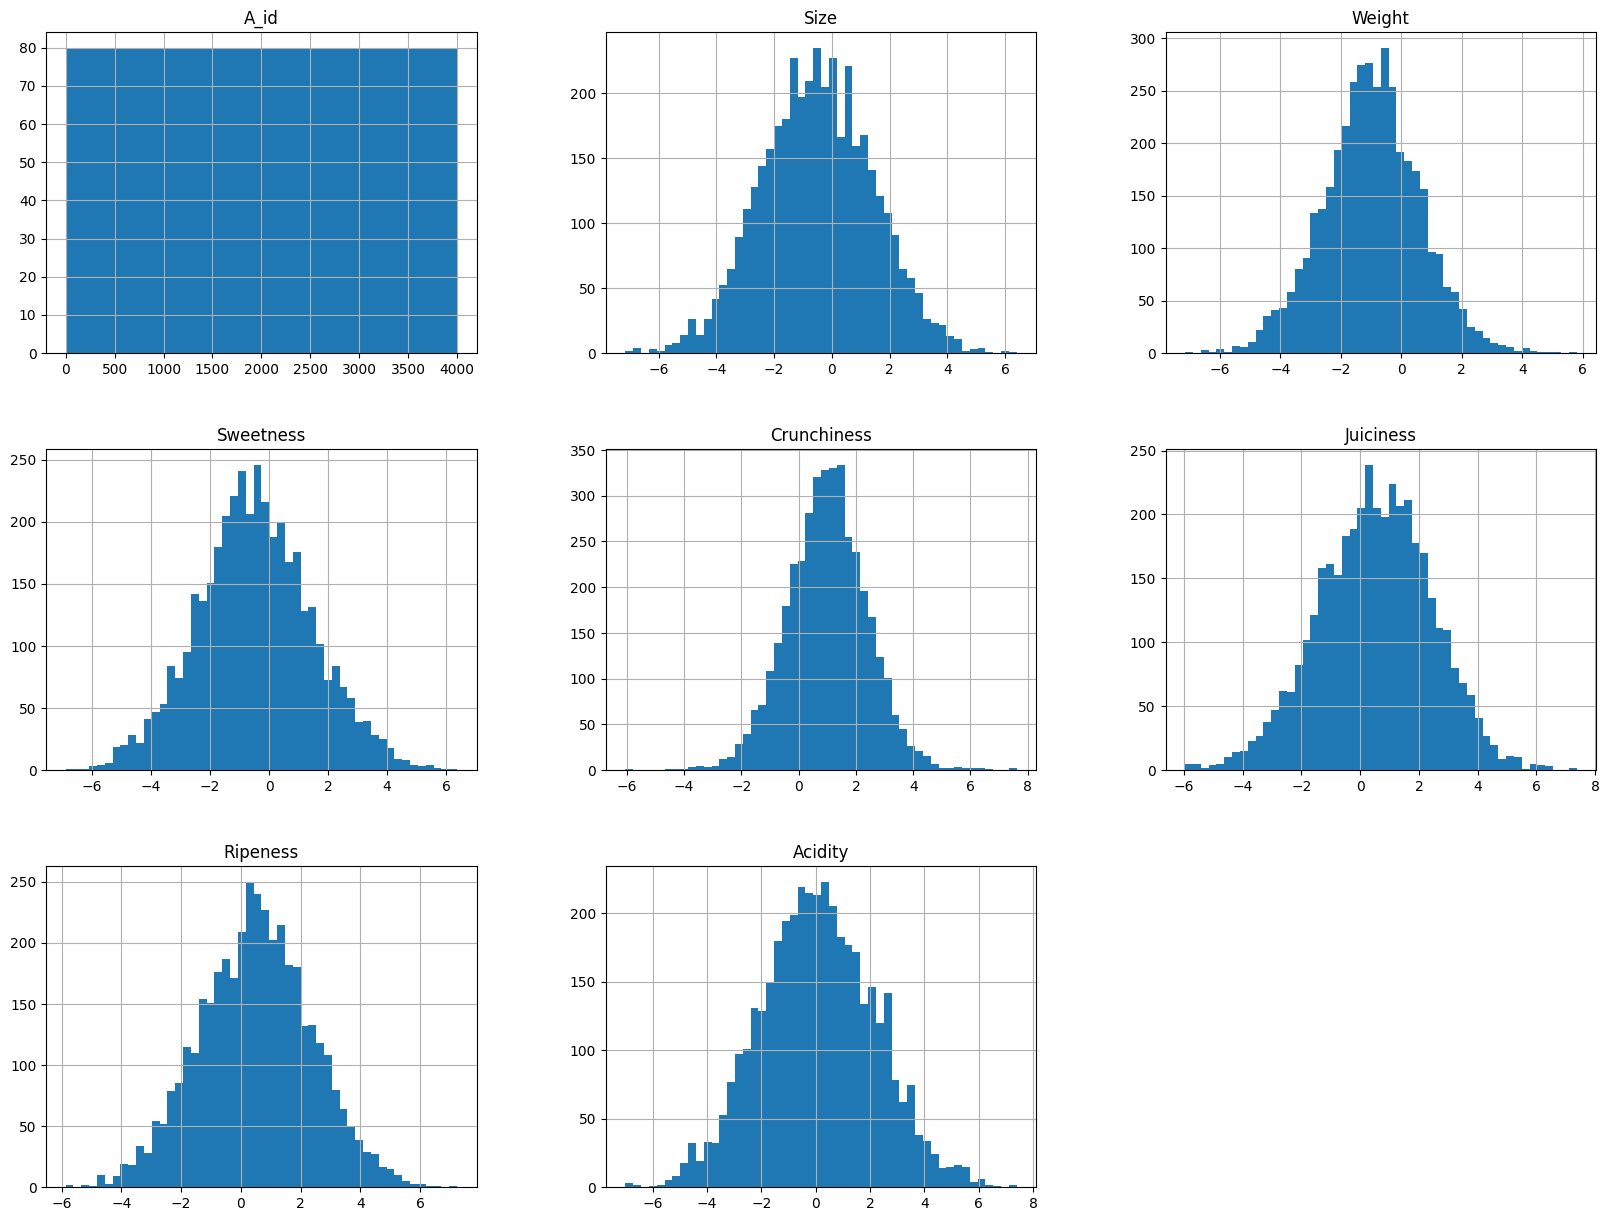

In [34]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

/tmp/ipykernel_49778/16267272.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

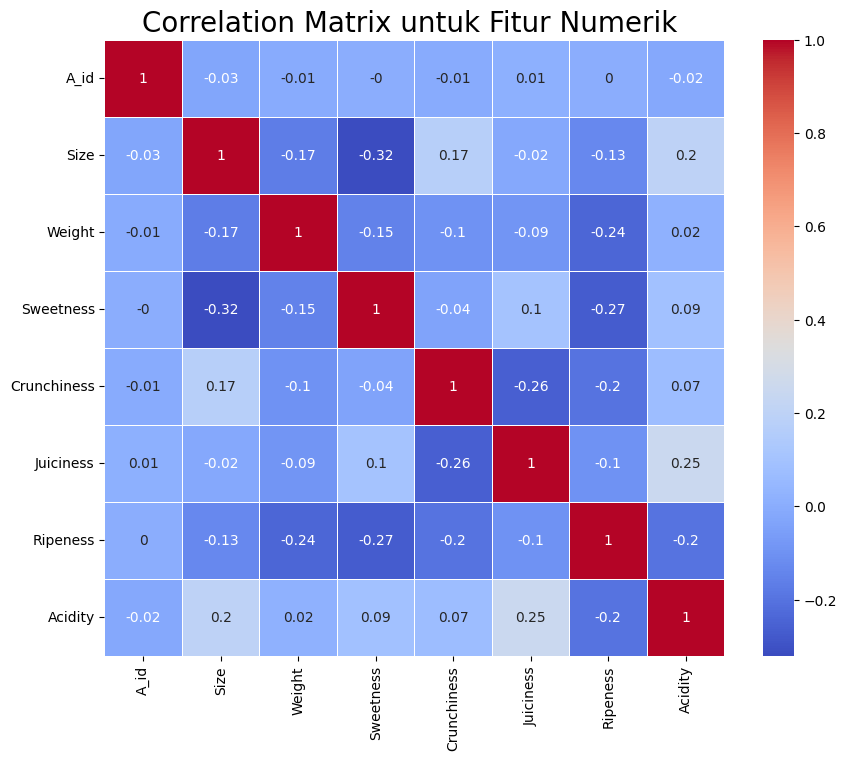

In [35]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)
    
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Handle Outlier

<Axes: xlabel='Size'>

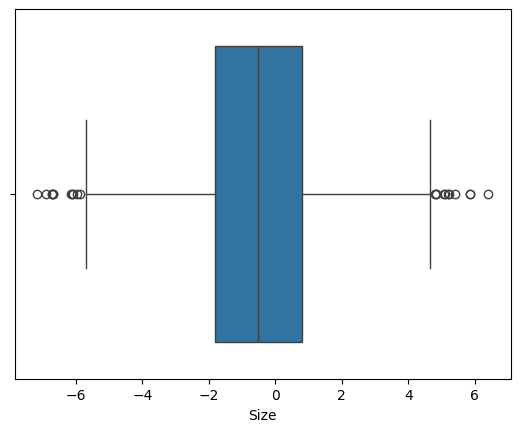

In [36]:
sns.boxplot(x=diamonds['Size'])

<Axes: xlabel='Weight'>

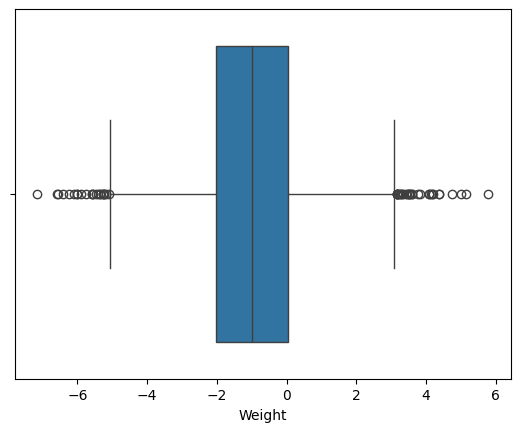

In [37]:
sns.boxplot(x=diamonds['Weight'])

In [38]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]
    
# Cek ukuran dataset setelah kita drop outliers
diamonds.shape

/tmp/ipykernel_49778/2315196497.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diamonds.quantile(0.25)
/tmp/ipykernel_49778/2315196497.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diamonds.quantile(0.75)
/tmp/ipykernel_49778/2315196497.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]


(3790, 9)

# Prepare Priction model

drop A_id karena meupakan data unique tidak penting untuk prediksi

In [39]:
diamonds.drop(columns=['A_id'], inplace=True)

merubah target menjadi angka agar mudah dibaca oleh komputer

In [40]:
diamonds['Quality'] = diamonds['Quality'].map({'good':1, 'bad':0})

Split data ke train dan validasi

In [41]:
from sklearn.model_selection import train_test_split
    
X = diamonds.drop(["Quality"],axis =1)
y = diamonds["Quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Menstandar data train dan test

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [43]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3790
Total # of sample in train dataset: 3411
Total # of sample in test dataset: 379


# Melatih Data dengan berbagai model

In [44]:
# Siapkan dataframe untuk analisis model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
models = pd.DataFrame(index=['accuracy'], 
                        columns=['KNN', 'RandomForest', 'Boosting'])

### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
    
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, Y_pred)
print("Akurasi {}".format(acc))
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))
models.loc['accuracy','KNN'] = acc

Akurasi 0.899736147757256
[[177  18]
 [ 20 164]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       195
           1       0.90      0.89      0.90       184

    accuracy                           0.90       379
   macro avg       0.90      0.90      0.90       379
weighted avg       0.90      0.90      0.90       379



### RandomForest

In [46]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=123)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, Y_pred)
print("Akurasi {}".format(acc))
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))
models.loc['accuracy','RandomForest'] = acc

Akurasi 0.8733509234828496
[[174  21]
 [ 27 157]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       195
           1       0.88      0.85      0.87       184

    accuracy                           0.87       379
   macro avg       0.87      0.87      0.87       379
weighted avg       0.87      0.87      0.87       379



### AdaBoost

In [47]:
from sklearn.ensemble import AdaBoostClassifier
    
boosting = AdaBoostClassifier(learning_rate=0.001, random_state=55)                             
boosting.fit(X_train, y_train)
Y_pred = boosting.predict(X_test)
acc = accuracy_score(y_test, Y_pred)
print("Akurasi {}".format(acc))
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))
models.loc['accuracy','Boosting'] = acc

Akurasi 0.5989445910290238
[[ 82 113]
 [ 39 145]]
              precision    recall  f1-score   support

           0       0.68      0.42      0.52       195
           1       0.56      0.79      0.66       184

    accuracy                           0.60       379
   macro avg       0.62      0.60      0.59       379
weighted avg       0.62      0.60      0.59       379



In [48]:
models = models.T

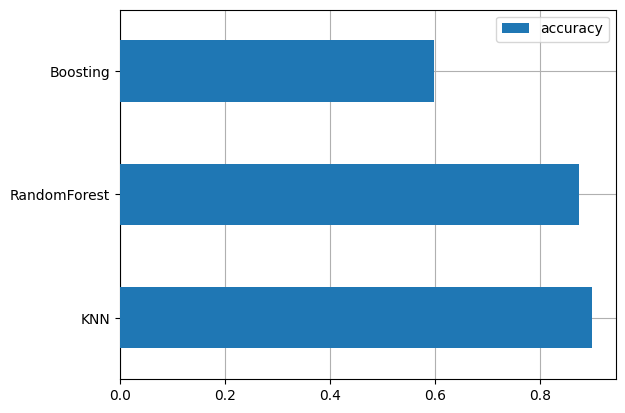

In [49]:
fig, ax = plt.subplots()
models.sort_values(by='accuracy', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)